In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.array([12,45,23,68,34,89,43,56,33,78,23])

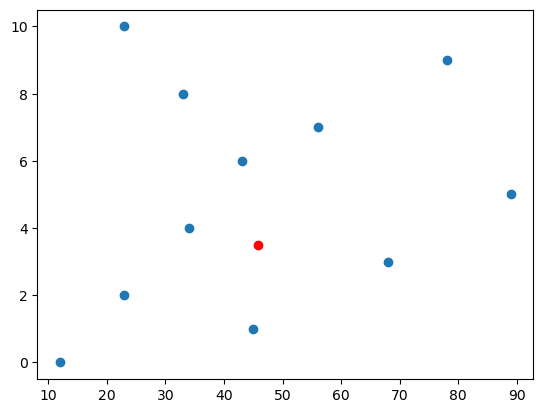

In [3]:
plt.scatter(x, range(11))
plt.scatter(x.mean(), 3.5, color = 'r')

In [4]:
std = np.sqrt(np.sum((x - x.mean())**2 )/len(x))

In [5]:
std

23.342579828670424

In [6]:
x.std()

23.342579828670424

#### standardization

In [7]:
def standardize(x):
    val = (x - x.mean())/x.std()
    return val

In [8]:
x_new = standardize(x)

In [9]:
x_new.std()

1.0

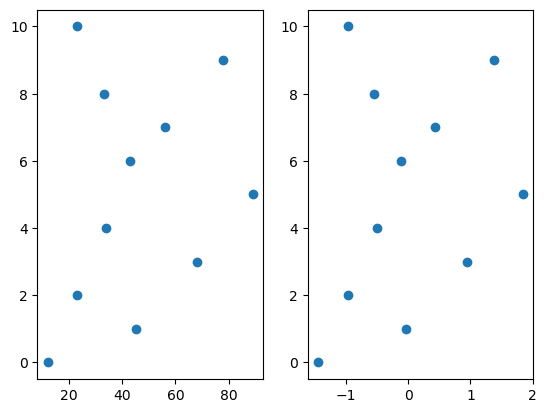

In [10]:
plt.subplot(1,2,1)
plt.scatter(x, range(11))

plt.subplot(1,2,2)
plt.scatter(x_new, range(11))


In [11]:
df = pd.read_csv('Social_Network_Ads.csv')

In [12]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [13]:
x = df[['Age', 'EstimatedSalary']]

In [14]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [15]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [18]:
x_new = pd.DataFrame(x_scaled, columns = x.columns)

In [19]:
x_new

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [20]:
x_new.std()

Age                1.001252
EstimatedSalary    1.001252
dtype: float64

### Data Rescaling/Balancing

In [21]:
pip install imbalanced-learn

In [22]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [23]:
df['Purchased']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [24]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20a5049f290>,
 [Text(-0.47615978768185807, 0.9916006537889979, '0'),
  Text(0.47615969484150195, -0.9916006983702906, '1')],
 [Text(-0.2597235205537407, 0.5408730838849078, '64.25%'),
  Text(0.2597234699135465, -0.5408731082019766, '35.75%')])

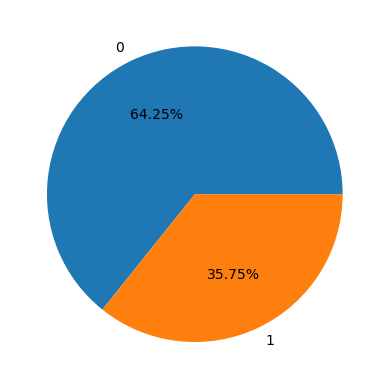

In [25]:
plt.pie(df['Purchased'].value_counts(), labels = df['Purchased'].value_counts().index, autopct = '%2.2f%%')

### Undersampling

In [26]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\shree\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\shree\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\shree\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\shree\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\shree\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\shree\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shree\anaconda3\Lib\site-packages\pip\_vend

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [33]:
from imblearn.under_sampling import RandomUnderSampler

In [36]:
rus = RandomUnderSampler()

In [37]:
y = df['Purchased']

In [38]:
x_new, y_new = rus.fit_resample(x, y)

In [39]:
y_new.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros = RandomOverSampler()

In [47]:
x_new, y_new = ros.fit_resample(x, y)

In [48]:
y_new.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

### Feature Selection

In [49]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [51]:
df = pd.read_csv('wisc_bc_data.csv')

In [52]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [54]:
x = df.drop(['id','diagnosis'], axis =1)

In [56]:
y = df['diagnosis']

In [57]:
x.shape

(569, 30)

In [59]:
from sklearn.feature_selection import SelectKBest, chi2

In [62]:
skf = SelectKBest(score_func = chi2, k = 5)

In [63]:
skf.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x0000020A592A9760>)

In [64]:
skf.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [65]:
x_new = x.iloc[:, skf.get_support()]
x_new 

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0
...,...,...,...,...,...
564,142.00,1479.0,158.70,166.10,2027.0
565,131.20,1261.0,99.04,155.00,1731.0
566,108.30,858.1,48.55,126.70,1124.0
567,140.10,1265.0,86.22,184.60,1821.0
